# COGS 181 Final Project on mask no mask dataset


### Yushan Wang A14459085
### Jiemin Tang A13948547

### Import package

In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from random import randint

# It should print "Using TensorFlow backend"

Using TensorFlow backend.


### Helper function

In [2]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)

### Initialize path directories for dataset

In [3]:
# paths for thw two dataset folders
mask = r'dataset/mask'
no_mask = r'dataset/no_mask'

### Load and Store images

In [4]:
# store images from the dataset
images = []
for file in list(os.listdir(mask)):
    images.append(cv2.imread(mask+'/'+file))
    
for file in list(os.listdir(no_mask)):
    images.append(cv2.imread(no_mask+'/'+file)) 
    
images = np.array(images)

### One-hot encoding for mask/no-mask

In [5]:
# store labels (mask = 1,0 and  no mask = 0,1)
n_mask = len(list(os.listdir(mask)))
n_no_mask = len(list(os.listdir(no_mask)))
labels = np.zeros(( n_mask  + n_no_mask, 2  ))
labels[:n_mask,0] = 1
labels[n_mask:,1] = 1
print('y shape',labels.shape)   #(2767, 2)
print('x shape',images.shape)   #(2767, 160, 160, 3)

y shape (2767, 2)
x shape (2767, 160, 160, 3)


### shuffle and split data

In [6]:
data_size = labels.shape[0]
index = list(range(data_size))
shuffle(index)
index = np.array(index)
images =   images[index]
labels =   labels[index,:]
x_train =  images[:int(0.8*data_size)]
y_train =  labels[:int(0.8*data_size),:] 
x_test =   images[int(0.8*data_size):]
y_test =   labels[int(0.8*data_size):,:]

### Preview data
#### Show random image with corresponding label

Without Mask


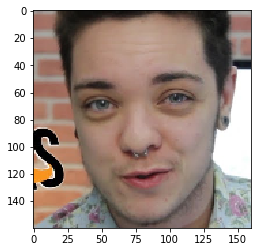

In [7]:
rand_int = randint(0, len(x_test))
plt.imshow(x_test[rand_int][:,:,::-1])
print((np.array(['With Mask','Without Mask'])[y_test[rand_int] == 1])[0])

### initialize model parameters

In [8]:
img_rows, img_cols = images.shape[1], images.shape[2]
input_shape = (images.shape[1], images.shape[2], images.shape[3])
batch_size = 1
num_classes = 2

### Create Model

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 77, 77, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)       

### Train the model

In [10]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 2213 samples, validate on 554 samples
Epoch 1/20
2213/2213 [==============================] - 171s 77ms/step - loss: 0.8811 - accuracy: 0.6742 - val_loss: 0.6442 - val_accuracy: 0.6986
Epoch 2/20
2213/2213 [==============================] - 228s 103ms/step - loss: 0.6733 - accuracy: 0.6882 - val_loss: 0.7006 - val_accuracy: 0.5794
Epoch 3/20
2213/2213 [==============================] - 230s 104ms/step - loss: 0.7231 - accuracy: 0.6150 - val_loss: 0.5940 - val_accuracy: 0.7004
Epoch 4/20
2213/2213 [==============================] - 219s 99ms/step - loss: 0.6809 - accuracy: 0.8206 - val_loss: 0.4198 - val_accuracy: 0.7978
Epoch 5/20
2213/2213 [==============================] - 226s 102ms/step - loss: 0.2270 - accuracy: 0.9214 - val_loss: 0.1359 - val_accuracy: 0.9531
Epoch 6/20
2213/2213 [==============================] - 229s 104ms/step - loss: 0.2077 - accuracy: 0.9331 - val_loss: 0.1327 - val_accuracy: 0.9513
Epoch 7/20
2213/2213 [==============================] - 229s 103ms/

### Evaluate model

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2757654857085446
Test accuracy: 0.9657039642333984


### Test model

['Without Mask']


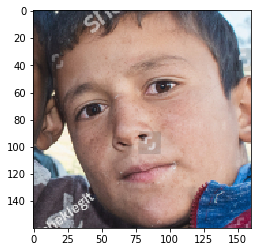

In [15]:
rand_int = randint(0, 552)
m = model.predict(x_test[rand_int].reshape(-1,160,160,3)) == model.predict(x_test[rand_int].reshape(-1,160,160,3)).max()
plt.imshow(x_test[rand_int][:,:,::-1])
print(np.array(['With Mask','Without Mask'])[m[0]])

### Save the model

In [16]:
# save the model
modelsave_name = 'quarantine_face_mask.h5'
model.save(modelsave_name)